In [1]:
from schemas_python import lab, reference, subject, action, task, acquisition
import datajoint as dj
import networkx, graphviz

Please enter DataJoint username: root
Please enter DataJoint password: ········
Connecting root@localhost:3306


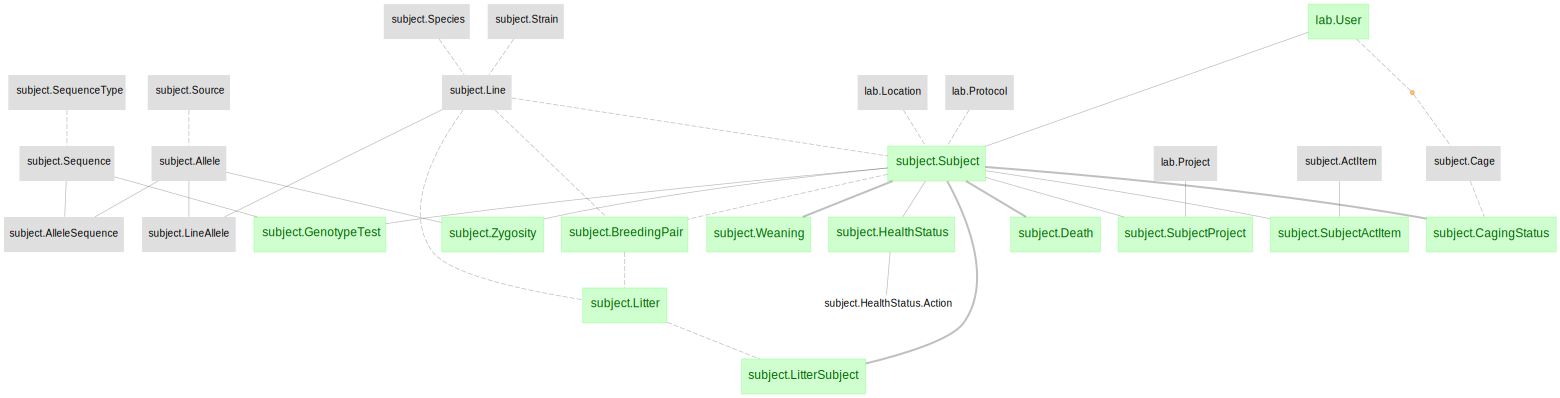

In [3]:
dj.Diagram(subject) - 1

In [3]:
dj.__version__

'0.12.dev4'

In [5]:
subject.Subject.describe();

-> lab.User
subject_id           : char(8)                      # nickname
---
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
-> lab.Location
-> [nullable] lab.Protocol
-> [nullable] subject.Line
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        



In [7]:
subject.Subject()

user_id username,subject_id nickname,genomics_id number from the facility,sex sex,dob birth date,head_plate_mark little drawing on the head plate for mouse identification,location,protocol protocol number,line name,subject_description description,initial_weight
ben,B205,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B208,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B3151,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4486,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4487,None,Male,None,=BLOB=,vivarium,1910,DAT-IRES-CRE,,27.0
ben,B4488,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
ben,B4489,None,Male,None,=BLOB=,vivarium,1910,Unknown,,27.0
edward,E18,None,Male,None,=BLOB=,valhalla,1910,Unknown,,26.0
edward,E26,None,Male,None,=BLOB=,vivarium,1910,Unknown,,24.0
edward,E36,None,Male,None,=BLOB=,vivarium,1910,Unknown,,23.0


In [14]:
lab.Lab.describe();

lab                  : varchar(16)                  # name of lab
---
institution          : varchar(64)                  
address              : varchar(128)                 
time_zone            : varchar(32)                  



In [15]:
lab.User.describe();

user_id              : varchar(32)                  # username
---
full_name=null       : varchar(32)                  # first name
email=null           : varchar(64)                  # email address
phone=null           : varchar(12)                  # phone number
carrier=null         : varchar(16)                  # phone carrier
slack=null           : varchar(32)                  # slack username
contact_via          : enum('Slack','text','Email') 
presence             : enum('Available','Away')     
primary_tech="N/A"   : enum('yes','no','N/A')       
tech_responsibility="N/A" : enum('yes','no','N/A')       
day_cutoff_time      : blob                         
slack_webhook=null   : varchar(255)                 
watering_logs=null   : varchar(255)                 



In [16]:
lab.UserLab.describe();

-> lab.User
---
-> lab.Lab

